## Daily Show Guests


- starting time: 09:10

#### Occupation shift in the show (i.e. from actor -> politicians over year)
- small multiple of histogram chart/line
- standard line chart highlighting the specific occupation in red
- stream chart / stacked area chart (w/ abs number or w/ %) (d3.js)

#### Seasonality of occupation (i.e. politician come in winter)
- four seasons: bar chart?
- 12 months: bar chart (w/ start and end repeatition)

#### Timing of different occupation (i.e. politician come when election is near?)
- Bar chart of US election vs. Non-US election

#### Number of guests over years (i.e. more guests over year)
- ~~line chart~~

#### Most common guest on the show 
- ~~sort table~~

#### Most common occupation on the show
- ~~sort table~~

#### What occupation have the highest chance to get on the show ( i.e.  actotrs on the show / total actiors)
- link to the distribution of occupation of US


In [2]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.library['fivethirtyeight']['axes.prop_cycle']



'#30a2da'
'#fc4f30'
'#e5ae38'
'#6d904f'
'#8b8b8b'


In [3]:
from IPython.core.display import display, HTML
from string import Template
import json


In [8]:
guests = pd.read_csv("./data/data/daily-show-guests/daily_show_guests.csv")
guests.head()


,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [25]:
most_frequent = guests.pivot_table(index='Raw_Guest_List', aggfunc=np.count_nonzero).sort_values(by='Show', ascending=False)
most_frequent = most_frequent['GoogleKnowlege_Occupation']
most_frequent.head()

Raw_Guest_List
Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Paul Rudd         13
Ricky Gervais     13
Name: GoogleKnowlege_Occupation, dtype: int64

In [59]:
most_frequent = guests.pivot_table(index='Group', aggfunc=np.count_nonzero).sort_values(by='Show', ascending=False)
most_frequent = most_frequent['GoogleKnowlege_Occupation']
most_frequent

Group
Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Clergy              8
media               5
Name: GoogleKnowlege_Occupation, dtype: int64

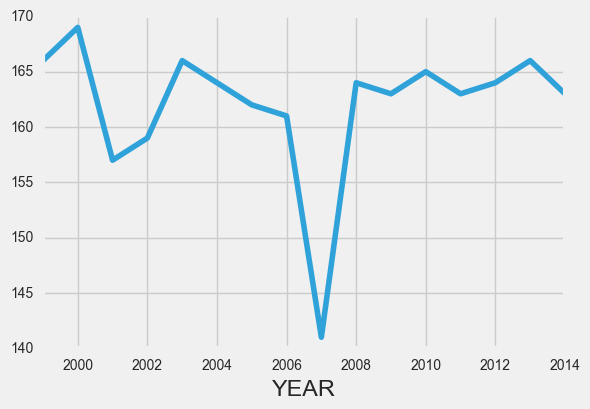

In [89]:
number_guests = guests.pivot_table(index='YEAR', values='Raw_Guest_List', aggfunc=np.count_nonzero)
number_guests = number_guests.drop(2015)
sns.tsplot(number_guests, time=number_guests.index)




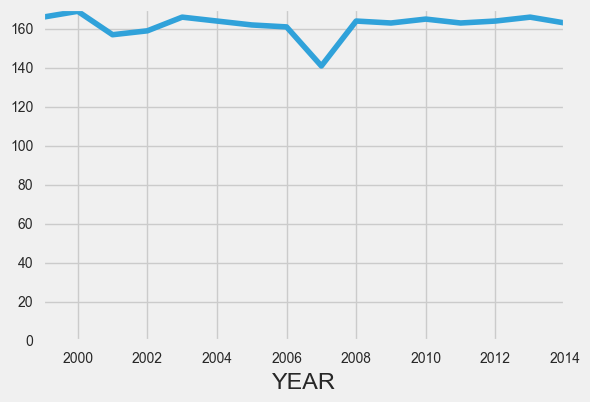

In [36]:
plt.ylim(0, 170)
sns.tsplot(number_guests, time=number_guests.index)

In [68]:
number_guests = guests.pivot_table(index=['YEAR', 'Group'], values='Raw_Guest_List', aggfunc=np.count_nonzero)
number_guests = number_guests.reset_index()
number_guests.head()



,YEAR,Group,Raw_Guest_List
0,1999,Acting,108
1,1999,Comedy,25
2,1999,Media,11
3,1999,Musician,17
4,1999,Politician,2


In [94]:
# sns.tsplot(number_guests, value='Raw_Guest_List', time="YEAR",condition='Group')

# sns.pointplot(data=number_guests, x= 'YEAR', y= 'Raw_Guest_List', hue='Group')
# plt.plot(data=number_guests[number_guests['Group'] == 'Acting'], x= 'YEAR', y= 'Raw_Guest_List')

actors = number_guests[number_guests['Group'] == 'Acting']

# plt.plot(x=actors['YEAR'], y=actors['Raw_Guest_List'])

actors['YEAR']
# actors


KeyError: 'Group'

In [87]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi